# 소득 예측 데이터 (데이콘)

이해원

**📌 주제**

1. 고객별 소득 예측하기
    - 그냥 '예측'에서 끝남.

2. 컬럼(주-소득, 부-기타 컬럼)별 특징을 바탕으로 고객 분류 -> 분류별로 비즈니스적 뭔가를 제안...
    - 비즈니스 상황 가정이 필요함.
    - e.g., 고객 세그먼트 별 새로운 대출상품을 추천하고자 한다.

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'
pd.set_option('display.max_columns', None)

In [21]:
income_forc = pd.read_csv('income_forecast_test.csv')

In [22]:
income_forc.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Nonfamily householder,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,Single,Child 18+ never marr Not in a subfamily,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,Single,Child 18+ never marr Not in a subfamily,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,Married,Spouse of householder,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,Single,Child <18 never marr not in subfamily,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


In [23]:
income_forc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10000 non-null  object
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Status        10000 non-null  object
 4   Employment_Status       10000 non-null  object
 5   Working_Week (Yearly)   10000 non-null  int64 
 6   Industry_Status         10000 non-null  object
 7   Occupation_Status       10000 non-null  object
 8   Race                    10000 non-null  object
 9   Hispanic_Origin         10000 non-null  object
 10  Martial_Status          10000 non-null  object
 11  Household_Status        9999 non-null   object
 12  Household_Summary       10000 non-null  object
 13  Citizenship             10000 non-null  object
 14  Birth_Country           10000 non-null  object
 15  Bir

In [24]:
income_forc.describe(include='all')

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
count,10000,10000.000000,10000,10000,10000,10000.000000,10000,10000,10000,10000,10000,9999,10000,10000,10000,10000,10000,10000,10000.00000,10000.000000,10000.000000,10000
unique,10000,NaN,2,17,8,NaN,24,15,5,10,7,27,8,5,42,42,43,6,NaN,NaN,NaN,3
top,TEST_0000,NaN,F,High graduate,Children or Armed Forces,NaN,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),NaN,NaN,NaN,Under Median
freq,1,NaN,5206,3173,5566,NaN,2316,2316,8364,8932,4862,3128,4322,8924,8923,8290,8313,4357,NaN,NaN,NaN,6642
mean,NaN,35.945000,NaN,NaN,NaN,35.181800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418.67940,37.429700,140.100700,NaN
std,NaN,17.947835,NaN,NaN,NaN,22.187519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4495.74002,266.559206,1540.462778,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN
25%,NaN,23.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN
50%,NaN,35.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN
75%,NaN,47.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN


In [32]:
# 컬럼별 고유값 출력

def get_unique(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(unique_values)
        print()

get_unique(income_forc)

['TEST_0000' 'TEST_0001' 'TEST_0002' ... 'TEST_9997' 'TEST_9998'
 'TEST_9999']

[79 47 18 39  6 31 17 11 71 43 52 22 55  5 29 37 33 42 46 38 10 34  3 61
 40 16 23 28 15 48  9 41 44 26 57 65 21 27 49 25 19 69 24 70 32 30 68  1
 56 82 12  8 58 80 76 35  7 75  4 51 59 36 20 81 54 87 72 62 77 64  0 60
 63 50 14 45 73 53 66  2 13 78 90 83 67 86 84 88 74 89 85]

['M' 'F']

['High Junior' 'Elementary (5-6)' 'Associates degree (Vocational)'
 'Children' 'High Freshman' 'College' 'High graduate' 'Bachelors degree'
 'Associates degree (Academic)' 'High Sophomore' 'Middle (7-8)'
 'Professional degree' 'Masters degree' 'High Senior' 'Elementary (1-4)'
 'Doctorate degree' 'Kindergarten']

['Children or Armed Forces' 'Full-Time' 'Choice Part-Time' 'Not Working'
 'Part-Time (Usually Part-Time)' 'Seeking Full-Time' 'Seeking Part-Time'
 'Part-Time (Usually Full-Time)']

[ 0 52 30 24 51 16 39 38 50 10 40 20  1 46 28 44  8 26 35 42 48  6 12 36
 49 15 17 47 22 45 18  2 13  3  4 11 25 33 32 27 23  5 41 14  

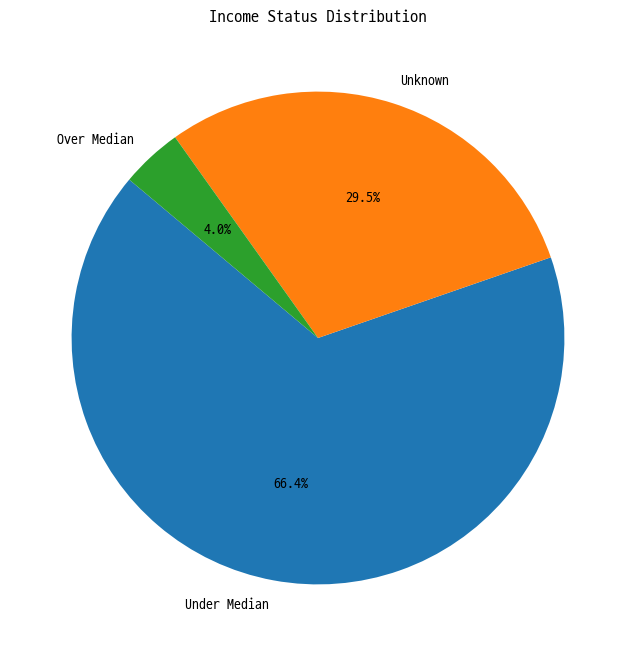

In [41]:
# income status 파이 차트 확인
value_counts = income_forc['Income_Status'].value_counts()
labels = value_counts.index.tolist()
sizes = value_counts.tolist()

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Income Status Distribution')
plt.show()